In [1]:
!nvidia-smi

Wed Feb 21 04:09:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
raw_data = pd.read_csv(r"C:\Users\Sharath Chandra\Downloads\archive\labeled_data.csv")

In [4]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
raw_data.shape

(24783, 7)

In [6]:
raw_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [7]:
# Let's drop the columns which are not required for us.
raw_data.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace =True)

In [8]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
# Let's check for the unique values in the dataset
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

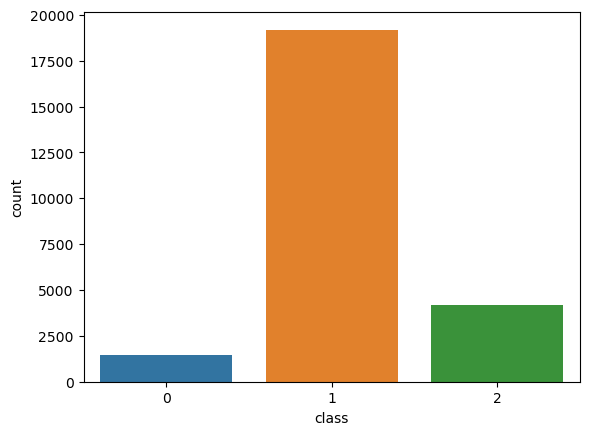

In [10]:
# Plotting the countplot for our new dataset
sns.countplot(x='class',data =raw_data)

- class 0: hate
- class 1: abusive
- class 2: no hate

In [11]:
# Let's copy the valus of the class 1 into class 0.
raw_data[raw_data['class']==0]['class']=1

C:\Users\Sharath Chandra\AppData\Local\Temp\ipykernel_17848\3749826095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[raw_data['class']==0]['class']=1


In [12]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
raw_data['class'].unique()

array([2, 1, 0], dtype=int64)

In [14]:
# Let's check the values in the class 0
raw_data[raw_data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [15]:
# replace the value of 0 to 1
raw_data["class"].replace({0:1},inplace=True)

In [16]:
raw_data["class"].unique()

array([2, 1], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

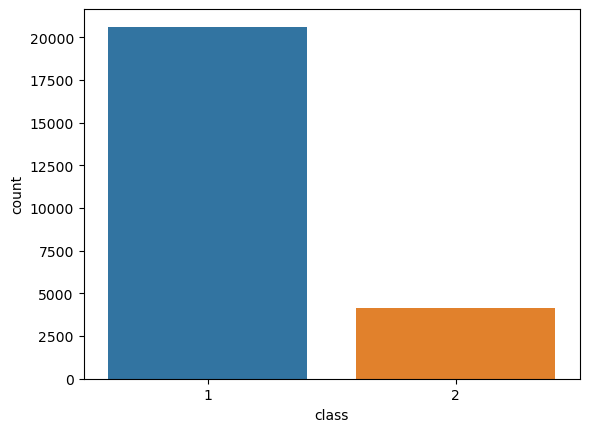

In [17]:
sns.countplot(x="class",data= raw_data)

In [18]:
# Let's replace the value of 2 to 0.
raw_data["class"].replace({2:0}, inplace = True)

<Axes: xlabel='class', ylabel='count'>

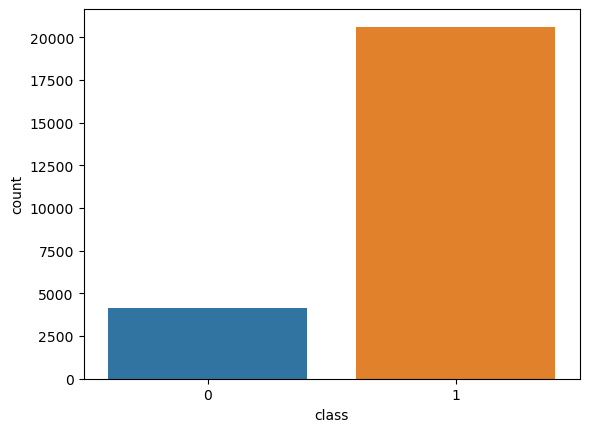

In [19]:
sns.countplot(x='class',data=raw_data)

In [29]:
imbalance_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [20]:
raw_data.head()

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [21]:
# Let's change the name of the 'class' to label
raw_data.rename(columns={'class':'label'},inplace =True)

In [22]:
raw_data.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [23]:
# Let's concatinate both the data into a single data frame.
frame = [ raw_data]
df = pd.concat(frame)

In [24]:
df.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [25]:
df.shape

(24783, 2)

<Axes: xlabel='label', ylabel='count'>

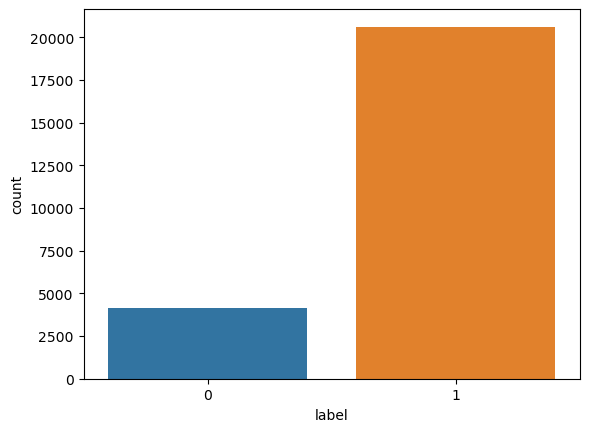

In [26]:
sns.countplot(x='label',data=df)

## Preprocessing

In [27]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sharath
[nltk_data]     Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
# Let's apply stemming and stopwords on the data
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

In [29]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words

In [30]:
df["tweet"][1]

'!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!'

In [31]:
# let's apply the data_cleaning on the data.
df['tweet']=df['tweet'].apply(data_cleaning)

In [32]:
df["tweet"][1]

' rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in the  plac  rt  boy dats coldtyga dwn bad for cuffin dat hoe in t

In [33]:
x = df['tweet']
y = df['label']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Let's split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

18587 18587
6196 6196


## Feature engineering

In [37]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [40]:
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [41]:
sequences_matrix

array([[14893, 14894,  1233, ...,   321,  1922,   229],
       [  491,    46,    72, ...,   256,   292,   491],
       [   21,   147,     7, ...,   328,    68,    40],
       ...,
       [    0,     0,     0, ...,   676,  2519, 22913],
       [   17,   827,    14, ...,  1588,     1,   398],
       [    0,     0,     0, ...,     8,    34,   317]])

In [45]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [52]:
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

# Define max_words and max_len
max_words = 50000
max_len = 300

# Creating model architecture
model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=max_words, output_dim=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model (not always necessary for summary, but good practice)
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 300, 100)            │       5,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_6                  │ (None, 300, 100)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,080,501 (19.38 MB)

 Trainable params: 5,080,501 (19.38 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [54]:
# starting model training
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

117/117 ━━━━━━━━━━━━━━━━━━━━ 53s 431ms/step - accuracy: 0.8426 - loss: 0.3972 - val_accuracy: 0.9398 - val_loss: 0.1494


In [55]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [56]:
test_sequences_matrix

array([[   0,    0,    0, ...,   76,   84,    5],
       [   0,    0,    0, ...,  170,  178, 3019],
       [ 403,    4, 5283, ...,   78,  442,  403],
       ...,
       [  19,    9,  176, ...,  353,   58,  656],
       [   9, 4855,  248, ...,    8, 6370,  302],
       [   0,    0,    0, ...,   98, 2327, 1105]])

In [57]:
# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9308 - loss: 0.1631


In [58]:
lstm_prediction = model.predict(test_sequences_matrix)

194/194 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step


In [59]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
print(confusion_matrix(y_test,res))

[[ 803  238]
 [ 193 4962]]


In [62]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [63]:
# Let's save the mdoel.
model.save("model.h5")

In [64]:
import keras

In [65]:
load_model=keras.models.load_model("model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [68]:
# Let's test our model on custom data.
test = 'i love'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


i love
i love
['love']
[[82]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
pred [[0.538857]]
hate and abusive


In [69]:
!pip install gradio jinja2

In [70]:
import tensorflow as tf
import gradio as gr

In [71]:
model = tf.keras.models.load_model('model.h5')

In [73]:
# Let's test our model on custom data.
test = 'i love'

def clean_text(text):
    print(text)
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    print(text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

test=[clean_text(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")


i love
i love
['love']
[[82]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
pred [[0.538857]]
hate and abusive


In [74]:
import gradio as gr

def predict_hate_speech(text):
    cleaned_text = clean_text(text)
    test = [cleaned_text]
    seq = tokenizer.texts_to_sequences(test)
    padded = pad_sequences(seq, maxlen=300)
    pred = model.predict(padded)
    if pred < 0.5:
        return "No hate"
    else:
        return "Hate and abusive"

# Define Gradio interface
iface = gr.Interface(
    fn=predict_hate_speech,
    inputs="text",
    outputs="text",
    title="Hate Speech Detection",
    description="Enter a sentence to check if it contains hate speech or abusive language."
)

# Launch the Gradio app
iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


I love you
i love you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
very bad
very bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
abusaive
abusaive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
abusaive
abusaive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
